In [1]:
#import libraries and dependencies

import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import pandas as pd

from config import (
    consumer_key,
    consumer_secret,
    access_token,
    access_token_secret
    )

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
#initial variables

search_id = 0
botname = '@Spicy_Michelada'
previous_analysis = ['test']
already_searched = False
running = 0

In [ ]:
#here is our whole program:

while running != 0:
    analysis_request()

    if search_name[0] == '@':
        check_previous()
        
    if already_searched = False:
        previous_analysis.append(search_name)
        account_analysis()
        results_graphing()
        results_tweeting()
    else:
        
        
        
#insert the 5 min wait here.

In [56]:
#cell 1 to test things:

tweet = api.search(q=botname, count=1, parser=tweepy.parsers.JSONParser())
tweet_text = tweet['statuses'][0]['text']
text_list = tweet_text.split()
if text_list[1] == 'Analyze:':
    print('cool')
    search_name = text_list[2]
    print(search_name)
date = tweet['statuses'][0]['created_at']
date = date.split()
request_date = date[:3]
request_date[0]

cool
@danharmon


'Mon'

In [52]:
#cell 2 to test things:
n_tweets = 1
for status in tweepy.Cursor(api.user_timeline, id='@danharmon').items(n_tweets):
    tweet=status._json

In [3]:
#create a function to scan for relevant tweets directed at this bot - 
#format is @Spicy_Michelada Analyze: @CNN <-- so the tweets need to took like this.

#do a search (we're going to search for only the most recent item)
tweet_search = api.search(q=botname, since_id=search_id, parser=tweepy.parsers.JSONParser(), 
                              count=1)
search_id = tweet_search['statuses'][0]['id']
tweet_text = tweet_search['statuses'][0]['text']
text_list = tweet_text.split()
if text_list[1] == 'Analyze:':
    search_name = text_list[2]
        #get the date of the tweet request to use for later in the plot title
    date = tweet_search['statuses'][0]['created_at']
    date = date.split()
    request_date = date[:3]

search_name

'@danharmon'

In [5]:
#check to see if that account has been analyzed before - tweet either "analyzing" or "sorry, we've already
#done an analysis on that account"

#def check_previous():
for user in previous_analysis:
    if user == search_name:
        print('Sorry, that account has already been analyzed.')
        api.update_status('Sorry, that account has already been analyzed.')
        already_searched = True
    else:
        already_searched = False
        api.update_status(f'Hold on while we perform an analysis of the account {search_name}.')
        print('Hold on while we perform an analysis of that account.')
            
            


Hold on while we perform an analysis of that account.


In [6]:
#pull 500 tweets from the account and use Vader to analyze while looping through them.
#create a df with the compound, and also a list with "tweets ago" which can be just x from each loop - subtracting 1 for each
#loop.

#def account_analysis():
n_tweets = 10
x = 0
tweets_ago_list = []
compound_list = []
for status in tweepy.Cursor(api.user_timeline, id=search_name).items(n_tweets):
    tweet = status._json
    tweets_ago = x
    x = x-1
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    compound_list.append(compound)
    tweets_ago_list.append(tweets_ago)

compound_list

[0.8687, 0.4588, -0.2263, 0.0129, -0.2023, 0.4184, 0.4019, 0.1531, 0.0, 0.4019]

In [11]:
df = pd.DataFrame({
    'Tweet Polarity': compound_list,
    'Tweets Ago': tweets_ago_list
    })
    
df = df.sort_values(by='Tweets Ago', ascending=True)
df

,Tweet Polarity,Tweets Ago
9,0.4019,-9
8,0.0000,-8
7,0.1531,-7
6,0.4019,-6
5,0.4184,-5
4,-0.2023,-4
3,0.0129,-3
2,-0.2263,-2
1,0.4588,-1
0,0.8687,0


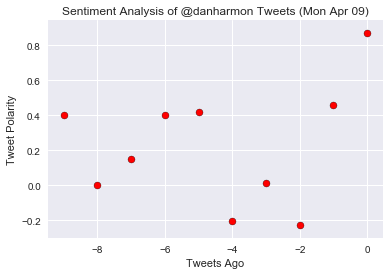

In [22]:
#graph the results and format the graph with the date pulled (which is the current date - we should be able to get the date
#from the request tweet asking for analysis)
#include the name of the analyzed account in the graph as part of the title (use a f string f"string text {variable})

#create a dataframe of the list, and then sort it to make sure that it is ascending? descending?

#def results_graphing():



sns.set()
plt.scatter(x=df['Tweets Ago'], y=df['Tweet Polarity'], facecolor='red', color='k')
plt.title(f'Sentiment Analysis of {search_name} Tweets ({request_date[0]} {request_date[1]} {request_date[2]})')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.show()
    
    #probably will have to save the image now to be able to tweet it out

In [ ]:
#tweet out the resultant graph

#def results_tweeting():


